`63070501061 S.RAKNA`

# 4. PCA for MNIST data
Using the MNIST data of 784 dimensions (28 x 28 pixels).

> 5 points. 0.5 hours.
### 4.1 Show Quiz 7 problem #3 here again as a benchmark.
- Using 50,000 data samples for training and 20,000 for testing, 
- apply standard scalar transform from the training dataset to both your training and testing datasets. 
- Report the accuracy and print out the confusion matrix.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

mnist = arff.loadarff('./mnist_784.arff')

In [2]:
# convert to pandas dataframe
df = pd.DataFrame(mnist[0])

y = df['class']
X = df.drop('class', axis=1)

# convert to numpy array
y = y.values
X = X.values

# convert to int
y = y.astype(int)
X = X.astype(int)

# divided by 255 to normalize
X = X / 255

# StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"X.shape: {X_scaled.shape}")
print(f"y.shape: {y.shape}")


X.shape: (70000, 784)
y.shape: (70000,)


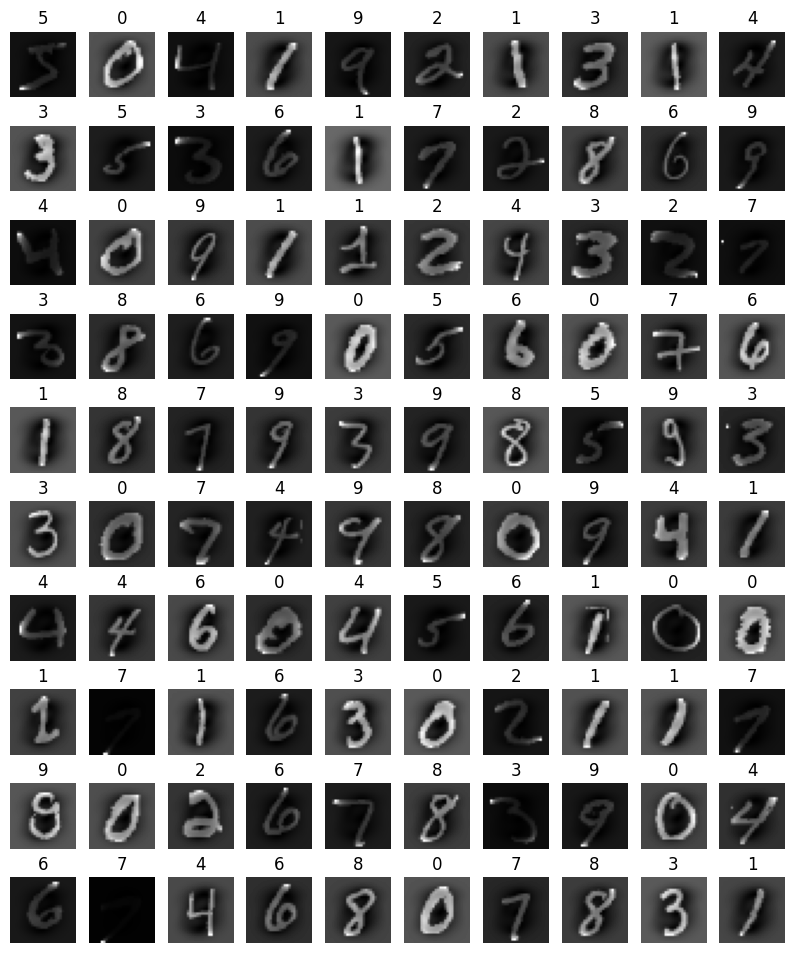

In [3]:
# plot the first 10 images with their labels
plt.figure(figsize=(10, 12))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_scaled[i].reshape(28, 28), cmap='gray')
    plt.title(y[i])
    plt.axis('off')
plt.show()

In [4]:
# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=20000/70000, random_state=42)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (50000, 784)
X_test.shape: (20000, 784)
y_train.shape: (50000,)
y_test.shape: (20000,)


In [5]:
classifier = MLPClassifier(
    hidden_layer_sizes=(50, 20, 10),
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=True,
    random_state=1,
    learning_rate_init=0.1,
)
# fit the model on the training data
classifier.fit(X_train, y_train)

Iteration 1, loss = 0.42904690
Iteration 2, loss = 0.23782301
Iteration 3, loss = 0.20236261
Iteration 4, loss = 0.20212767
Iteration 5, loss = 0.17725427
Iteration 6, loss = 0.13928782
Iteration 7, loss = 0.20810504
Iteration 8, loss = 0.40979619
Iteration 9, loss = 0.32643789
Iteration 10, loss = 0.66247930
Iteration 11, loss = 1.58198030
Iteration 12, loss = 2.36142498
Iteration 13, loss = 2.31476247
Iteration 14, loss = 2.36748088
Iteration 15, loss = 2.40672785
Iteration 16, loss = 2.40657465
Iteration 17, loss = 2.40659129
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(50, 20, 10), learning_rate_init=0.1,
              max_iter=100, random_state=1, solver='sgd', verbose=True)

In [6]:
print("Training set score: %f" % classifier.score(X_train, y_train))
print("Test set score: %f" % classifier.score(X_test, y_test))

Training set score: 0.112760
Test set score: 0.112000


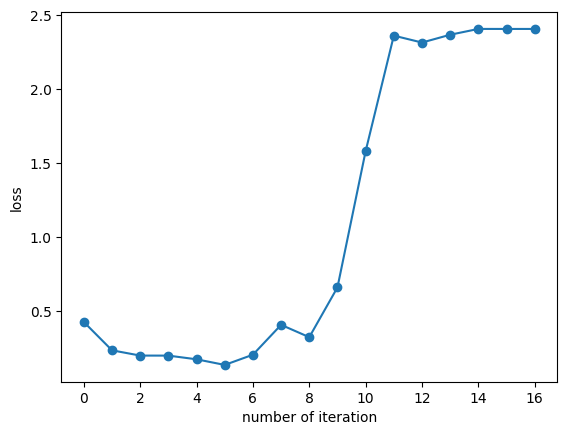

In [7]:
fig, axes = plt.subplots(1, 1)
axes.plot(classifier.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()


In [8]:
len(classifier.intercepts_) == len(classifier.coefs_) == 4

True

Accuracy: 11.2 %


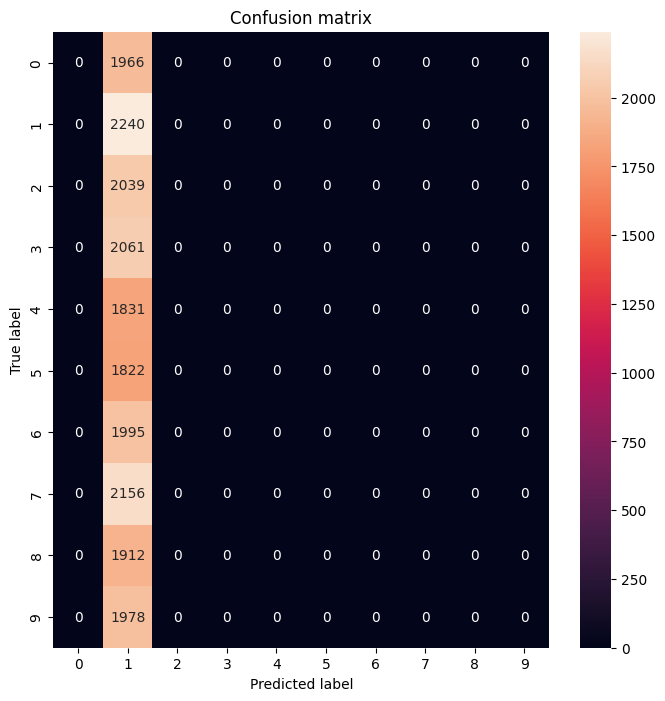

In [9]:
# Report your accuracy and print out the confusion matrix.
y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

# accuracy
print(f"Accuracy: {100 * np.sum(y_pred == y_test) / len(y_test)} %")

# Plot the confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

> 20 points. 2 hours.
### 4.2 PCA for MNIST data
- Using the same neural network model as in 4.1 above, 
- **but using the PCA features that preserve up to 95% of the information content,** 
- find a new training and testing dataset using PCA transformation based on the training dataset. 
- Apply standard scalar transform from the training dataset to both your training and testing datasets. 
- Report the accuracy and print out the confusion matrix for PCA with reduced features.

In [10]:
# Using PCA features that preserve 95% of the information content

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

print(f"X_pca.shape: {X_pca.shape}")


X_pca.shape: (70000, 154)


In [11]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=20000/70000, random_state=42)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (50000, 154)
X_test.shape: (20000, 154)
y_train.shape: (50000,)
y_test.shape: (20000,)


In [12]:
classifier.fit(X_train, y_train)

Iteration 1, loss = 0.39931383
Iteration 2, loss = 0.14807064
Iteration 3, loss = 0.11503760
Iteration 4, loss = 0.09650705
Iteration 5, loss = 0.08301223
Iteration 6, loss = 0.07276153
Iteration 7, loss = 0.06677156
Iteration 8, loss = 0.06482017
Iteration 9, loss = 0.05420014
Iteration 10, loss = 0.05122438
Iteration 11, loss = 0.04810558
Iteration 12, loss = 0.04635123
Iteration 13, loss = 0.04505049
Iteration 14, loss = 0.04321694
Iteration 15, loss = 0.04039354
Iteration 16, loss = 0.03557225
Iteration 17, loss = 0.03796110
Iteration 18, loss = 0.03301950
Iteration 19, loss = 0.03410855
Iteration 20, loss = 0.03175462
Iteration 21, loss = 0.03238211
Iteration 22, loss = 0.02810764
Iteration 23, loss = 0.02959948
Iteration 24, loss = 0.03000228
Iteration 25, loss = 0.02783239
Iteration 26, loss = 0.02469651
Iteration 27, loss = 0.02571769
Iteration 28, loss = 0.02448770
Iteration 29, loss = 0.02455637
Iteration 30, loss = 0.03436930
Iteration 31, loss = 0.02406060
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50, 20, 10), learning_rate_init=0.1,
              max_iter=100, random_state=1, solver='sgd', verbose=True)

In [13]:
print("Training set score: %f" % classifier.score(X_train, y_train))
print("Test set score: %f" % classifier.score(X_test, y_test))

Training set score: 0.994240
Test set score: 0.967500


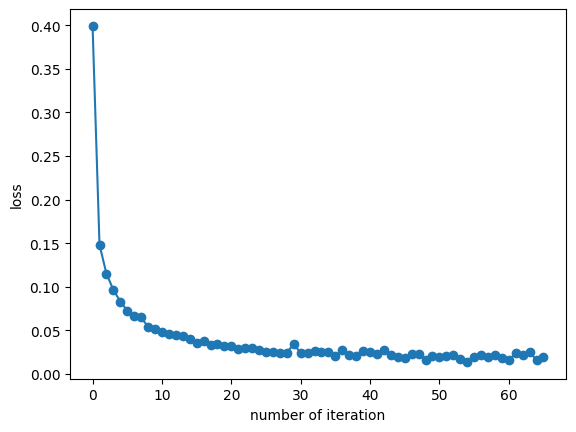

In [14]:
fig, axes = plt.subplots(1, 1)
axes.plot(classifier.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()


In [15]:
len(classifier.intercepts_) == len(classifier.coefs_) == 4

True

Accuracy: 96.75 %


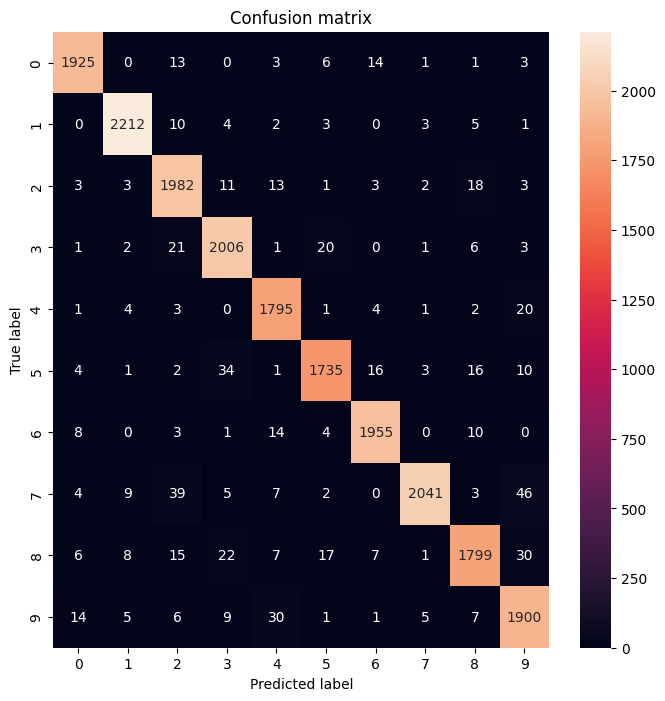

In [16]:
# Report your accuracy and print out the confusion matrix.

y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

# accuracy
print(f"Accuracy: {100 * np.sum(y_pred == y_test) / len(y_test)} %")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()